##                 **Adaptive Real time learning for Credit Card Fraud Detection**


Finance industry is one key sector where Machine learning is gaining huge attention. There are many algorithms like Bayesian models, support vector machines, neural networks, decision trees etc. that have been widely applied to tackle complex problems in finance, such as market direction forecasting and Credit Card Fraud Detection. But all these ML pipelines have many limitations when used. 

#### Credit Card Fraud Detection

Banks and credit card companies are on the hook to resolve fraudulent charges at the earliest, so they want to detect/block as many of them as soon as possible. They already have sophisticated mathematical models to detect possible bogus transactions, but these models are applied in a batch environment at a later stage. How does one deploy them in real-time? 

Source: mapr.com/blog

For most of these financial applications data patterns varies from time to time and hence models should be built accordingly with the new data in real time to accomodate the true potential in Data patterns for making predictions. Adaptive Real time learning is meaningful here because in these scenarios past data is not a good predictor of the future, apart from the very recent data which shows the need for building and updating models in real time.

Let us see how we can use artml library for predicting Credit Card Fraud Detections in real time.

### ART-ML explaination with Creditcard transactions Dataset

These datasets are gathered from kaggle and a public repository. Check the links and data sources to learn more about the Data. This is one of the real world scenarios where ART-ML can show its true potential apart from the exsisting methods. Two Credit Card Fraud Detection datasets are used in this Notebook to understand the potential and power of ART-ML.

Datasources:


[Kaggle dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)

[Repository dataset](https://github.com/AdaptiveMachineLearning/artml/tree/master/examples/datasets)

Let's start by importing some libraries and examining the data.

In [1]:
# Importing all the required libraries
import os
import math
from numpy import * 
import numpy as np
import pandas as pd

### Data preparation

In [2]:
df = pd.read_csv('Credit_train.csv')
df = df.dropna()

In [3]:
df.head()

,seq,Credit_Default,BE_SCORE_ON_OD,BNI_SCORE_ON_OD,BUSAGE,BUSSTRUC,MAXLINEUTIL,AVGLINEUTIL12,MAXLINEBALRT,MAXTIMESLBAL12,DAYSDELQ,TOTDAYSDELQ12,TOTACBAL,MAXDELQ,TOTDELQ12,DEPOSITRT,AVGDEPRT12,ALL_OPEN_TRADE_UT,BR_OPEN_TRADE_UT,BR_TRADE_PAST_DUE
0,7,1,637.0,292.0,67.0,1.0,0.8702,0.768375,0.9535,0.0,0.0,0,26322.47,0.0,4.0,0.0949,0.0486,57.0,57.0,0.0
1,4,1,618.0,736.0,97.0,1.0,0.8449,0.552183,0.8449,0.0,0.0,0,84498.81,1.0,5.0,0.0000,0.2137,75.0,75.0,0.0
2,8,1,452.0,357.0,25.0,1.0,1.0927,0.962591,1.0927,8.0,0.0,0,32782.18,1.0,1.0,0.0000,0.4224,91.0,95.0,2.0
3,9,1,816.0,968.0,72.0,1.0,0.8626,0.636644,0.8583,0.0,0.0,0,64109.12,0.0,0.0,0.0104,0.6894,50.0,4.0,0.0
4,7,1,782.0,968.0,151.0,2.0,1.0085,0.737366,1.0085,1.0,0.0,0,55469.94,7.0,7.0,0.0000,0.0950,19.0,0.0,0.0


In [4]:
df['Credit_Default'].value_counts()

0    17873
1     1659
Name: Credit_Default, dtype: int64

In [5]:
#Importing the artml library
from artml import bet

In [6]:
#creating the basic elemensts table for the dataset.
BET =  bet.create_bet(df)

### Data Exploration

In [7]:
#Importing artml explore for calculating univariate & bivariate statistics
from artml.explore import stats

In [8]:
#Finding the Univariate statistics for the dataset.
stats.univariate(BET)

,seq,Credit_Default,BE_SCORE_ON_OD,BNI_SCORE_ON_OD,BUSAGE,BUSSTRUC,MAXLINEUTIL,AVGLINEUTIL12,MAXLINEBALRT,MAXTIMESLBAL12,DAYSDELQ,TOTDAYSDELQ12,TOTACBAL,MAXDELQ,TOTDELQ12,DEPOSITRT,AVGDEPRT12,ALL_OPEN_TRADE_UT,BR_OPEN_TRADE_UT,BR_TRADE_PAST_DUE
count,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,1.953200e+04,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000
Mean,6.005837,0.084938,709.535685,868.540856,112.957557,1.614888,2.117881,0.963112,4.556448,1.218001,0.346559,0.038808,2.319331e+04,0.147809,0.686924,22.943921,8.548588,43.548587,40.663066,0.046846
Variance,6.777869,0.077723,8565.347539,36439.980053,10501.754752,0.848310,36547.096272,2241.875176,111792.925920,5.954216,39.539788,0.101402,5.033392e+08,0.351335,2.786737,435658.535940,71915.434150,754.572747,1030.894411,0.075473
Standard_deviation,2.603434,0.278789,92.549163,190.892588,102.478070,0.921037,191.172949,47.348444,334.354491,2.440126,6.288067,0.318437,2.243522e+04,0.592735,1.669352,660.044344,268.170532,27.469488,32.107544,0.274723
coeff_of_variation,43.348400,328.227931,13.043623,21.978539,90.722633,57.034124,9026.613156,4916.191087,7338.050917,200.338572,1814.426456,820.541829,9.673143e+01,401.015049,243.018458,2876.772235,3137.015496,63.077793,78.959970,586.436509
skewness,-0.008363,2.978070,-3.720252,-2.629212,2.289309,1.472527,131.056483,128.315256,91.411123,2.436549,44.957011,12.661512,1.439913e+00,6.155816,3.075770,83.416061,118.199372,0.125103,0.437261,9.789211
Kurtosis,-1.243443,6.869255,25.136789,6.394327,9.496664,1.184336,17695.404230,17117.939358,8774.358336,5.567562,3203.712864,230.451987,2.743754e+00,52.093885,10.076107,7861.567866,15265.354077,-0.918534,-1.019197,154.085953


The above calculated Univariate statistics gives basic understanding of the data and all of features of the dataset which can be updated in real time and can be seen on a dashboard as they get updated. These summarised statistics are important in any domain for understanding and exploring the total data

In [9]:
#Finding Bivariate statistics like correlation to understand which feaures are correlating with the target variable
stats.correlation(BET)

,seq,Credit_Default,BE_SCORE_ON_OD,BNI_SCORE_ON_OD,BUSAGE,BUSSTRUC,MAXLINEUTIL,AVGLINEUTIL12,MAXLINEBALRT,MAXTIMESLBAL12,DAYSDELQ,TOTDAYSDELQ12,TOTACBAL,MAXDELQ,TOTDELQ12,DEPOSITRT,AVGDEPRT12,ALL_OPEN_TRADE_UT,BR_OPEN_TRADE_UT,BR_TRADE_PAST_DUE
seq,1.000000,-0.003857,0.005789,0.002450,0.008189,-0.017980,0.000198,0.001707,-0.003367,-0.009759,-0.005600,-0.005955,-0.018529,-0.003711,-0.007755,0.005511,0.004027,-0.009882,-0.008266,0.000978
Credit_Default,-0.003857,1.000000,-0.175957,-0.234950,-0.078933,-0.004606,0.022960,0.023492,0.019232,0.221667,0.140800,0.161257,0.066106,0.355923,0.306310,-0.007965,-0.008097,0.131428,0.152578,0.144578
BE_SCORE_ON_OD,0.005789,-0.175957,1.000000,0.489298,0.135802,0.031687,-0.020429,-0.019198,-0.026332,-0.254621,-0.029157,-0.034640,-0.024046,-0.085041,-0.078565,0.000777,0.004622,-0.309833,-0.350963,-0.189195
BNI_SCORE_ON_OD,0.002450,-0.234950,0.489298,1.000000,0.143782,0.030380,-0.026571,-0.023113,-0.041599,-0.271531,-0.032995,-0.049651,-0.038966,-0.099149,-0.084003,0.007024,0.007153,-0.348881,-0.393773,-0.181302
BUSAGE,0.008189,-0.078933,0.135802,0.143782,1.000000,0.073963,-0.004962,-0.005930,-0.002120,-0.036571,-0.020118,-0.038801,0.069964,-0.008968,0.035284,0.003559,0.011732,-0.103434,-0.098556,-0.009508
BUSSTRUC,-0.017980,-0.004606,0.031687,0.030380,0.073963,1.000000,0.001888,0.001276,-0.003543,-0.022648,0.006204,0.013776,-0.041021,0.011987,0.031003,-0.005185,-0.009879,0.016220,0.005351,-0.007410
MAXLINEUTIL,0.000198,0.022960,-0.020429,-0.026571,-0.004962,0.001888,1.000000,0.958993,0.714573,0.012886,-0.000320,-0.000951,0.008932,0.057003,0.015514,-0.000350,-0.000321,-0.002805,-0.000843,-0.001302
AVGLINEUTIL12,0.001707,0.023492,-0.019198,-0.023113,-0.005930,0.001276,0.958993,1.000000,0.598125,0.013569,-0.000133,-0.000817,0.010375,0.056704,0.014535,-0.000487,-0.000510,-0.003837,0.000084,-0.001075
MAXLINEBALRT,-0.003367,0.019232,-0.026332,-0.041599,-0.002120,-0.003543,0.714573,0.598125,1.000000,0.028412,-0.000554,-0.001365,-0.000899,0.030786,0.011389,0.001327,-0.000185,0.008034,0.003777,-0.001927
MAXTIMESLBAL12,-0.009759,0.221667,-0.254621,-0.271531,-0.036571,-0.022648,0.012886,0.013569,0.028412,1.000000,0.072385,0.086431,0.121753,0.096588,0.073792,-0.005120,-0.008048,0.198134,0.228522,0.113990


### Updating BET in Real Time :

As the new labelled data gets generated, The model perfomance can be improved by training the model with new data and by deleting the effects of old data in the model in real time. Learn and forget functions in artml library helps to update BET in real time with the data. Also, artml library has the power to incorporate and delete certain features in the model in real time. As we are updating the effect of new data into the model we can perform real time feature selection using arml and hence update the model with new features whenever required. 

Although we can use Forget and Learn functions to training model with data in real time, What data to be added to the model and what data needs to be deleted should be decided based on domain knowledge and also by checking model perfomance

Let us see how we can use different functions in artml library to update the models in real time...

### Forget function

Suppose if we want our model not to consider certain past transactions data which might be irrelavent currently, Use forget function to remove the effect of that data in the BET and correspondingly in ML models 

In [10]:
df_forget = df.head(5000)
BET = bet.forget(BET, df_forget)

### Learn function

Suppose if we want our model to be updated with the new labbeled transactions data which streams in real time, Use learn function to add the effect of these data in the BET and correspondingly in ML models

In [11]:
df_newdata = df.head(5000)
BET = bet.learn(BET, df_newdata)

In [12]:
stats.univariate(BET)

,seq,Credit_Default,BE_SCORE_ON_OD,BNI_SCORE_ON_OD,BUSAGE,BUSSTRUC,MAXLINEUTIL,AVGLINEUTIL12,MAXLINEBALRT,MAXTIMESLBAL12,DAYSDELQ,TOTDAYSDELQ12,TOTACBAL,MAXDELQ,TOTDELQ12,DEPOSITRT,AVGDEPRT12,ALL_OPEN_TRADE_UT,BR_OPEN_TRADE_UT,BR_TRADE_PAST_DUE
count,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,1.953200e+04,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000,19532.000000
Mean,6.005837,0.084938,709.535685,868.540856,112.957557,1.614888,2.117881,0.963112,4.556448,1.218001,0.346559,0.038808,2.319331e+04,0.147809,0.686924,22.943921,8.548588,43.548587,40.663066,0.046846
Variance,6.777869,0.077723,8565.347539,36439.980053,10501.754752,0.848310,36547.096272,2241.875176,111792.925920,5.954216,39.539788,0.101402,5.033392e+08,0.351335,2.786737,435658.535940,71915.434150,754.572747,1030.894411,0.075473
Standard_deviation,2.603434,0.278789,92.549163,190.892588,102.478070,0.921037,191.172949,47.348444,334.354491,2.440126,6.288067,0.318437,2.243522e+04,0.592735,1.669352,660.044344,268.170532,27.469488,32.107544,0.274723
coeff_of_variation,43.348400,328.227931,13.043623,21.978539,90.722633,57.034124,9026.613156,4916.191087,7338.050917,200.338572,1814.426456,820.541829,9.673143e+01,401.015049,243.018458,2876.772235,3137.015496,63.077793,78.959970,586.436509
skewness,-0.008363,2.978070,-3.720252,-2.629212,2.289309,1.472527,131.056483,128.315256,91.411123,2.436549,44.957011,12.661512,1.439913e+00,6.155816,3.075770,83.416061,118.199372,0.125103,0.437261,9.789211
Kurtosis,-1.243443,6.869255,25.136789,6.394327,9.496664,1.184336,17695.404230,17117.939358,8774.358336,5.567562,3203.712864,230.451987,2.743754e+00,52.093885,10.076107,7861.567866,15265.354077,-0.918534,-1.019197,154.085953


**  In the above mentioned cases we used forget and learn functions on the same data to show that finally after forgetting and learning on the same data there wont be any effect on the final BET table. If we see univariate stats which were calculated initially and then after using forget, learn functions they are same.*

### Modeling

LDA is one of the classification model which gives good prediction accuracies in most of the cases. Hence LDA is chosen for making predictions about the credit card fraud detections. Import LDA from the artml library for making predictions as shown below.

In [13]:
#importing lda model from the artml library
from artml.models import lda

In [14]:
#fit the training data with lda
lda = lda.LinearDiscriminantAnalysis()
lda.fit(BET, 'Credit_Default')

#### Testing data

In [15]:
#Get testing data preprocess it
df1 = pd.read_csv('Credit_test.csv')
df1 = df1.dropna()
y_true = df1['Credit_Default']
df1 = df1.drop('Credit_Default', axis =1)

In [16]:
#use lda predict function for making the predictions
y_pred = lda.predict(df1)

In [17]:
sum(y_pred)

120

In [18]:
#Import accuracy_score from artml for finding the accuracy of the model
from artml.metrics import scores
scores.accuracy(y_true, y_pred)

91.988821611551

### Real Time Feature selection

Using artml library we can select best features among all available features in the real time. After selecting the best features, all the remaining features that are not contributing for the accuracy of the models can be deleted in the model. In future if we are getting better accuracies with another set of features then these features can be added in real time to the model on the fly making the process simple yet more Powerful!

In [19]:
#Importing feature_selection algorithm from artml library
from artml.feature_selection import mahalanobis_features
best = mahalanobis_features.mahalanobis_selection()

In [20]:
BET =  bet.create_bet(df)
features = best.forward_selection(BET,'Credit_Default', alpha=1.1)
features.append('Credit_Default')

In [21]:
#selected best features from all the available features
features

['MAXDELQ', 'BNI_SCORE_ON_OD', 'MAXTIMESLBAL12', 'Credit_Default']

### Fit the model with the selected best features

In [22]:
#First select the part of BET table with the best features

BET_best= BET.loc[features]
BET_best= BET_best[features]

In [23]:
#fit the model with new BET table
lda.fit(BET_best, 'Credit_Default')

In [24]:
#predicting and finding accuracies on the testing dataset with the new model
features.remove('Credit_Default')
y_pred = lda.predict(df1[features])
scores.accuracy(y_true, y_pred)

92.08197484862599

We can see that after the feature selection there was slight increase in overall testing accuracy from 91.01 to 91.15. In real world cases we can do feature selection in real time and update models on the fly in real time.

### kaggle Dataset

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud/home

### Data Preparation

In [25]:
df_credit = pd.read_csv('creditcard.csv')
df_credit = df_credit.dropna()
df_credit = df_credit.drop(['Time','Amount'], axis=1)
names = df_credit.columns

In [26]:
df_credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [27]:
df_credit['Class'].value_counts()
#This shows how unbalanced the dataset is

0    284315
1       492
Name: Class, dtype: int64

In [28]:
y = df_credit['Class']
X = df_credit.drop('Class', axis =1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [30]:
X_train['Class'] = y_train

In [31]:
BET_credit = bet.create_bet(X_train)

In [32]:
X_train.shape

(213605, 29)

### Real Time Data Exploration

In [33]:
stats.univariate(BET_credit)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,213605.000000,213605.000000,2.136050e+05,2.136050e+05,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,...,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,2.136050e+05,213605.000000,213605.000000,213605.000000
Mean,-0.000882,-0.001837,-5.146645e-05,-4.715957e-05,0.001733,-0.001226,0.001878,-0.001694,0.000736,-0.000823,...,0.000102,0.000649,-0.001274,0.000160,-0.000547,-0.001280,-4.156412e-05,-0.000218,0.000269,0.001774
Variance,3.852065,2.774050,2.297778e+00,2.006962e+00,1.941123,1.790792,1.563626,1.423421,1.204272,1.182281,...,0.607861,0.543524,0.527400,0.400213,0.366895,0.272795,2.328043e-01,0.163490,0.110571,0.001771
Standard_deviation,1.962668,1.665548,1.515842e+00,1.416673e+00,1.393242,1.338205,1.250450,1.193072,1.097393,1.087327,...,0.779654,0.737241,0.726223,0.632624,0.605719,0.522298,4.824980e-01,0.404339,0.332523,0.042085
coeff_of_variation,-222491.000354,-90647.549267,-2.945302e+06,-3.003999e+06,80395.764295,-109149.451025,66591.494736,-70419.884085,149114.093100,-132158.597926,...,768037.799705,113659.908599,-56999.096516,395156.880689,-110742.203434,-40804.078275,-1.160852e+06,-185719.624514,123413.174708,2371.922391
skewness,-3.365308,-4.952978,-2.241662e+00,6.852524e-01,-3.039593,2.011865,3.954282,-8.628776,0.545926,1.213472,...,-2.122855,3.703091,-0.240306,-6.540607,-0.549727,-0.424566,5.791203e-01,0.062186,12.421659,23.677397
Kurtosis,34.582442,104.625435,2.690431e+01,2.706565e+00,257.427640,53.649051,495.058556,228.002740,3.505528,30.096463,...,311.053496,206.677209,2.905625,459.785201,0.624063,4.473579,9.405131e-01,256.271166,1042.386864,558.621723


In [34]:
stats.correlation(BET_credit)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
V1,1.000000,0.015015,0.000527,-0.002276,-0.001342,-0.001872,-0.012172,0.004620,-0.002726,-0.003194,...,0.002456,-0.000716,0.003809,0.007188,-0.001920,0.002460,-0.001093,-0.001184,-0.008138,-0.095971
V2,0.015015,1.000000,0.009764,-0.006552,0.005192,-0.000973,-0.005216,-0.001362,-0.001357,0.003182,...,-0.001420,0.005339,0.002730,0.006886,-0.001377,0.001425,-0.000251,-0.001611,-0.009234,0.089208
V3,0.000527,0.009764,1.000000,-0.002757,0.004100,-0.006290,-0.016640,0.005745,-0.001790,-0.000336,...,0.004481,0.000790,0.001048,0.006445,0.000826,0.000177,-0.000634,-0.002773,0.001040,-0.190347
V4,-0.002276,-0.006552,-0.002757,1.000000,-0.000758,0.003038,0.004519,-0.000542,0.000570,0.002041,...,-0.000061,-0.000551,0.001147,-0.003654,-0.001215,-0.001861,0.001794,0.002505,0.004804,0.135527
V5,-0.001342,0.005192,0.004100,-0.000758,1.000000,-0.016899,-0.030143,0.006860,-0.001568,-0.000326,...,0.008255,0.004000,-0.001274,0.005254,-0.000862,0.001061,-0.000560,-0.009387,0.007328,-0.089219
V6,-0.001872,-0.000973,-0.006290,0.003038,-0.016899,1.000000,0.016007,-0.003270,-0.000287,-0.001587,...,-0.003995,-0.002340,0.000306,-0.003952,-0.000096,0.000351,0.000304,0.005001,-0.004874,-0.044754
V7,-0.012172,-0.005216,-0.016640,0.004519,-0.030143,0.016007,1.000000,-0.003645,-0.005505,-0.011877,...,-0.006283,-0.011973,0.001537,-0.002588,0.001440,0.000903,0.001026,0.010277,-0.005812,-0.181106
V8,0.004620,-0.001362,0.005745,-0.000542,0.006860,-0.003270,-0.003645,1.000000,0.000214,-0.001244,...,0.003552,-0.010094,0.006129,0.003437,-0.000010,-0.001091,-0.001638,-0.003957,0.000555,0.024039
V9,-0.002726,-0.001357,-0.001790,0.000570,-0.001568,-0.000287,-0.005505,0.000214,1.000000,-0.001855,...,-0.002146,-0.001557,-0.001277,-0.002733,-0.002388,-0.000247,-0.000946,0.001310,0.003054,-0.097310
V10,-0.003194,0.003182,-0.000336,0.002041,-0.000326,-0.001587,-0.011877,-0.001244,-0.001855,1.000000,...,-0.000531,-0.004126,0.000612,0.001676,-0.000323,0.001562,0.000130,0.002332,0.004590,-0.215231


### Real Time Data Modeling

In [35]:
#importing lda model from the artml library
from artml.models import lda

In [36]:
#fit the training data with lda
lda = lda.LinearDiscriminantAnalysis()
lda.fit(BET_credit, 'Class')

In [37]:
#use lda predict function for making the predictions
y_pred = lda.predict(X_test)

In [38]:
#Import accuracy_score from artml for finding the accuracy of the model
from artml.metrics import scores
scores.accuracy(y_test, y_pred)

99.93960843796522

### Real time feature Selection

In [39]:
#Importing feature_selection algorithm from artml library
from artml.feature_selection import mahalanobis_features
best = mahalanobis_features.mahalanobis_selection()

In [40]:
BET =  bet.create_bet(X_train)
features = best.forward_selection(BET,'Class', alpha=2.0)
features.append('Class')
features

['V14', 'V17', 'Class']

In [41]:
#First select the part of BET table with the best features

BET_best= BET.loc[features]
BET_best= BET_best[features]
BET_best

,V14,V17,Class
V14,"[213605, -118.8646141568488, 196887.1091481733...","[213605, -118.8646141568488, 196887.1091481733...","[213605, -118.8646141568488, 196887.1091481733..."
V17,"[213605, 29.607704305000652, 154053.3855161660...","[213605, 29.607704305000652, 154053.3855161660...","[213605, 29.607704305000652, 154053.3855161660..."
Class,"[213605, 379, 379, 379, 379, 213605, -118.8646...","[213605, 379, 379, 379, 379, 213605, 29.607704...","[213605, 379, 379, 379, 379, 213605, 379, 379,..."


In [42]:
#importing lda model from the artml library
from artml.models import lda

In [43]:
#fit the training data with lda
clf = lda.LinearDiscriminantAnalysis()
clf.fit(BET_best, 'Class')

In [44]:
#predicting and finding accuracies on the testing dataset with the new model
features.remove('Class')
y_pred = clf.predict(X_test[features])
scores.accuracy(y_test, y_pred)

99.91011488441336

Here even though the selected best features are only two, They are giving better acuuracy and precison results. Shows the power of feature extraction.

### Real Time Model evaluation

In [45]:
from artml.metrics import scores

In [46]:
scores.confusion_matrix(y_test, y_pred)

,pred_no,pred_yes
actual_no,71055,34
actual_yes,30,83


In [47]:
predicted_probas = clf.predict_proba(X_test[features])

In [48]:
import matplotlib.pyplot as plt
import scikitplot as skplt
from artml.metrics import plots

artml library has many inbuilt functions for plotting various model evaluation parameters like - 
1. Cummulative_gain (ROC)
2. roc_curve
3. precision_recall_threshold
4. confusion_matrix
All these plots helps us for evaluating the classifier and for finding the best threshold values

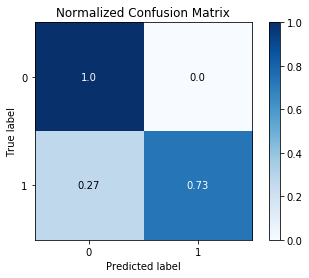

None


In [49]:
plots.confusion_matrix(y_test, y_pred)

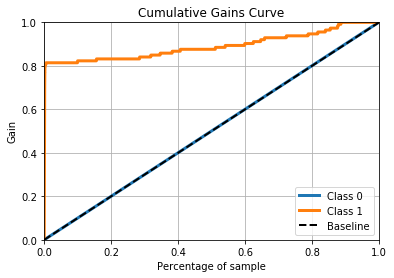

None


In [50]:
plots.cumulative_gain(y_test, predicted_probas)

Since the Dataset is very unbalanced by calculating the AUC we can get an idea about how good the classifier is. Here calculated AUC is 0.89 which shows the predictive power of the model.

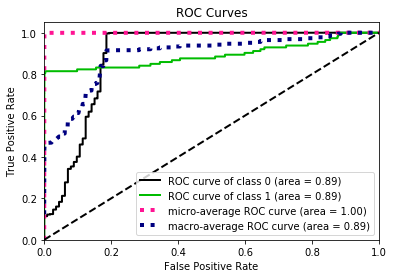

None


In [51]:
plots.roc_curve(y_test, predicted_probas)

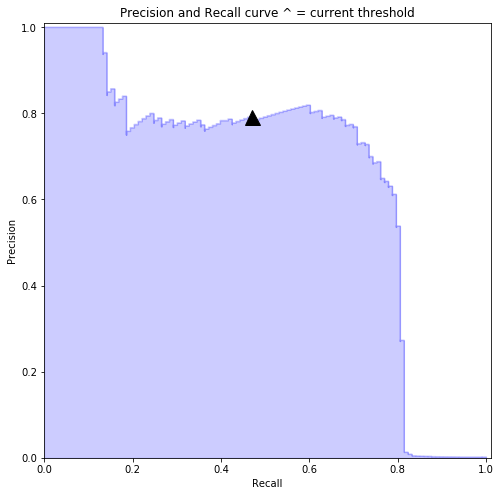

In [52]:
plots.precision_recall_threshold(y_test, predicted_probas[:,1],0.5)

Above precision_recall_threshold clearly shows that there is still chance to improve the sensitivity of the model by varying the threshold. Hence threshold is varied to 0.36 which increased the recall and precision of the model. Since in our case Recall is very important because we want to predict all of the fraud cases, we can change threshold accordingly.

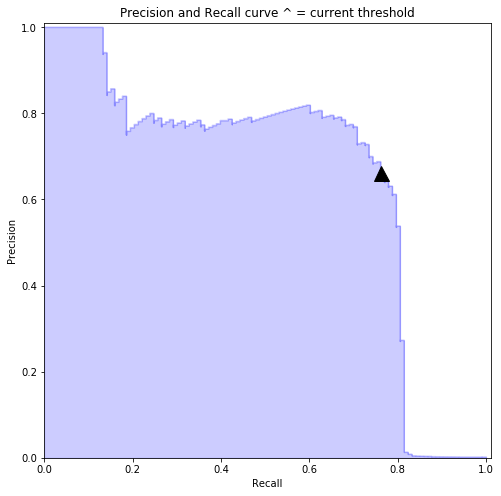

In [53]:
plots.precision_recall_threshold(y_test, predicted_probas[:,1],0.36)

#### Real Time Model evaluation

As the new labelled data gets generated, the model performance can be improved by training the model with new data and by deleting the effects of old data in the model in real time. Learn and forget functions in artml library helps to update BET in real time with the data. Once the BET table gets updated then the model is automatically upgraded on the fly. Also, artml library has the power to incorporate and delete certain features in the model in real time. As we are updating the effect of new data into the model we can perform real time feature selection using artml and hence update the model with new features whenever required. Although we can use Forget and Learn functions for training model with data in real time, what data to be added to the model and what data needs to be deleted should be decided based on domain knowledge and also by checking model performance Use learn, forget, grow, delete and feature selection functions from artml library for performing these tasks.



All the steps mentioned above can be automated in a pipeline which makes the process self-sustaining. This mentioned framework is applied only on a sample Kaggle dataset. We look forward to apply this in real scenario on a Big data. The model and tasks can be built even better for each specific Business case making it more powerful. Contact us for any Industrial consultations.

----------------------------------------------------------------------------------------------------------------------------